<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AI Bootcamp / SECTION 4*

---

# Small Project 1. Techniques for Better Model

## 🏆 학습 목표
- 더 나은 딥러닝 모델을 만들기 위한 기법들에 대해 설명할 수 있습니다.
  - 학습률(Learning Rate)가 무엇인지 설명할 수 있습니다.
  - 가중치 초기화(Weight Initialization)에 대해 설명할 수 있습니다.
  - 과적합을 방지하기 위한 기법들에 대해 설명할 수 있습니다.
    - Drop Out
    - Weight Decay
  - 배치 정규화(Batch Normalization)에 대해 설명할 수 있습니다.

## 🛫 Warm up

아래는 인공 신경망(Artificial Neural Network)이 동작하는 과정입니다.
1. 입력층에서 입력된 신호를, 은닉층에서 가중합 연산과 활성화 함수를 거치고, 출력층에서 예측값을 내보내는 과정을 수행합니다.  
이를 **순전파(Forward Propagation)**라고 합니다.
2. 거꾸로 출력층에서 입력층까지 경사하강법을 통해 예측값과 실제값의 차이(손실)를 최소화하는 방향으로 가중치를 업데이트 합니다.  
이를 **역전파(Back Propagation)**라고 합니다.  

이번 시간에는 더 좋은 모델을 만들기 위해 순전파와 역전파 과정 중에 사용할 수 있는 여러 가지 기법들에 대해 알아보겠습니다.

## **1. 가중치 초기화 (Weight Initialization)**

인공 신경망이 데이터를 입력받으면 각 노드는 입력값을 어떤 파라미터와 곱하고 이를 모두 더해주는 과정을 거칩니다.  
이 때 이 어떤 파라미터를 **가중치**라고 하고 가중치는 입력값을 각각 얼만큼 반영할지, 즉, 각 입력값의 중요도를 측정하는 역할을 합니다.

<br>이어서 인공 신경망의 역전파 과정에서는 경사하강법을 통해 손실 함수를 최소화하는 방향으로 가중치를 조금씩 변경합니다.  
경사하강법은 경사를 내려갈 지점, 시작할 **임의의 지점**을 정해주어야 하기 때문에 맨 처음 가중치는 랜덤 값으로 설정합니다.  

<br>랜덤한 값이라고 하지만, 초기 가중치를 잘못 설정하면 기울기 소실/폭발과 같은 문제가 발생합니다.  
이러한 모델 훈련에 치명적인 문제를 발생하지 않게 하기 위해 **초기 가중치를 설정하는 기법**들이 발전되어 왔습니다.  
이 기법을 **가중치 초기화(Weight Initialization)**라고 합니다.  

<br>아래에서 은닉층이 5 개, 각 층의 노드가 1000개인 신경망을 통해 가중치에 따른 활성값의 변화를 살펴보겠습니다.

### **활성화 함수로 Sigmoid를 취해줄 때**


우선 모든 가중치를 0으로 한번 설정해보겠습니다.

입력 데이터들을 0과 가깝게 정규화하기 때문에 이 방법은 꽤 적절해보일 수도 있습니다.  
하지만 모든 가중치가 0이면 모든 활성값이 하나의 값(0.5)이 나오기 때문에 노드를 여러 개 구성하는 의미가 사라집니다.
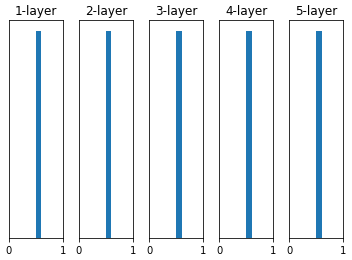

다음은 랜덤값을 설정할 때 가장 흔히 사용되는 정규분포를 사용해보겠습니다.  
표준 편차가 1인 정규분포로 가중치를 초기화를 진행해보겠습니다.  
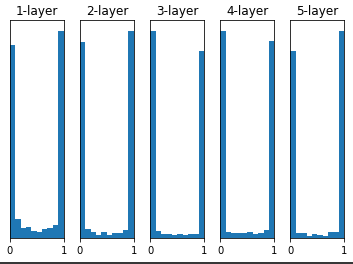  
보시다시피 활성값 대부분이 0또는 1이 되는 것을 볼 수 있습니다.  
활성값이 0또는 1이면 역전파 과정에서 미분값이 0이 되기 때문에 기울기 소실이 일어나게 됩니다.  

<br>표준 편차가 커지면 커질수록 더 많은 활성값이 0또는 1이 될 것입니다.  
표준 편차가 100인 정규분포를 통해 가중치를 초기화해보겠습니다.  
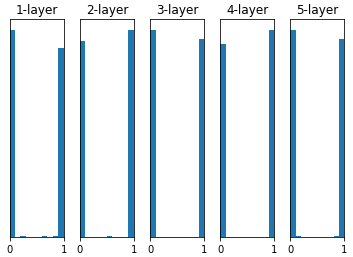  

그렇다면 표준 편차가 작아지면 어떻게 될까요?  
표준편차가 0.001인 정규분포로 가중치 초기화를 진행해보겠습니다.  
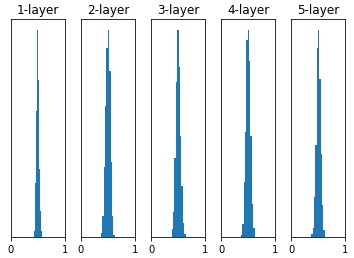  
가중치가 모두 0일 때와 마찬가지로 대부분의 값이 하나가 때문에 이 역시 노드를 여러개 구성하는 의미가 사라집니다.

#### **Xavier Initialization**

앞서 표준편차에 따라 생기는 문제에 대해 확인해보았습니다.  
Xavier Initialization은 이러한 문제를 해결하기 위해 제시된 기법입니다.  
논문을 발표했던 Xavier Glorot(사비에르 글로로트)의 이름을 따 Xavier 초기화라 부르며 Glorot 초기화라고 부르기도 합니다.

각 층마다 다른 범위의 가중치로 초기화시켜주는 방법으로 표준편차를 **$2\over{\sqrt{n+m}}$**로 하는 정규분포의 값으로 가중치를 초기화합니다.
- n = 이전 은닉층의 노드 개수
- m = 현재 은닉층의 노드 개수  

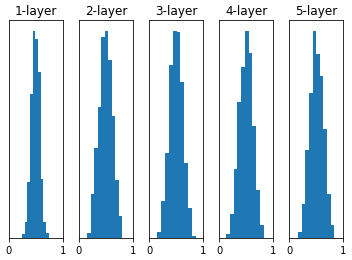  
보시다시피 활성값이 고르게 형태를 띄는 것을 볼 수 있습니다.  
활성값이 한 부분에 치우치지 않기 때문에 이전에 발생했던 문제에서 어느정도 자유로울 수 있습니다.

> ❗ *활성화 함수가 Tanh일 때는 어떻게 될까요?*

### **활성화 함수로 ReLU를 취해줄 때**

이번에는 은닉층의 활성화 함수로 ReLU를 취해줄 때 활성값을 확인해보겠습니다.  
먼저 표준 편차가 1인 정규분포로 가중치를 초기화해보겠습니다.  
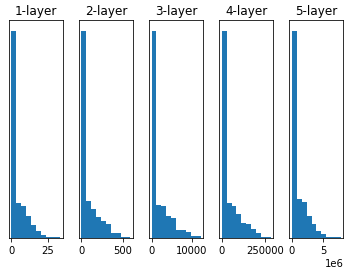   
ReLU는 양수일 때 가중합 연산값을 그대로 받기 때문에 층이 깊어질수록 양수값이 극단적으로 커지는 모습을 볼 수 있습니다.  
층이 깊어질수록 점점 큰 값을 이용해 연산이 진행되기 때문에 학습 과정이 불안정해집니다.

<br>표준 편차가 커질수록 양수의 활성값은 더욱 극단적으로 커질 것이고,  
표준 편차가 작아질수록 양수의 활성값을 극단적으로 작아져 0에 가까워 질 것입니다.

이번엔 Sigmoid 활성화 함수로 인해 발생한 문제를 해결했던 Xavier 초기화를 사용해보겠습니다.  
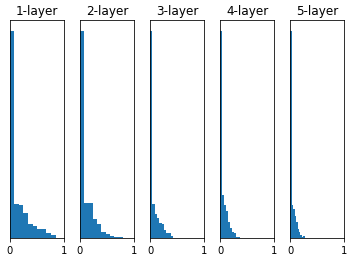  
층이 깊어질수록 모든 활성값이 0에 가까워지고 있습니다.  
활성값이 0이면 역시 기울기 소실 문제가 발생하게 됩니다.  

#### **He Initialization**

ReLU를 사용할 때에도 초기 가중치에 따른 문제가 발생했습니다.  
He Initialization은 이러한 해결하기 위해 제시된 기법입니다.  
역시 논문을 발표했던 Kaiming He(카이밍 허)의 이름을 따 He 초기화라고 부르며, Kaiming 초기화라고 부르기도 합니다.  

<br>He 초기화도 층마다 다른 분포의 가중치를 가지며 *$\sqrt{2\over{n}}$*를 표준 편차로 하는 정규분포의 값으로 초기화합니다.

- n = 이전 은닉층의 노드 개수  

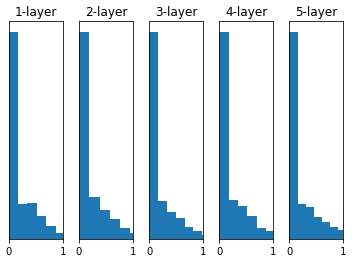   
보시다시피 이전과 다르게 활성값이 0부터 1까지의 범위에 고르게 퍼져있는 것을 볼 수 있습니다.  

### **어떤 가중치 초기화를 사용해야 할까?**

초기화 기법들이 제시된 이유에 따라 일반적으로 아래와 같이 사용하는 것을 권장합니다.

- 활성화 함수가 **Sigmoid**일 때는 **Xavier Initialization**,  
- 활성화 함수가 ReLU일 때는 **He Initialization**

하지만 데이터의 특성이나 모델의 구조 등 수많은 이유에 따라 이를 무조건 따르진 않습니다.  

### **코드 예제**

앞서 개념 설명을 위해 사용된 시각화 자료를 만들기 위한 코드입니다.  
```Dense``` 층을 추가할때 ```kernel_initializer```을 통해 가중치 초기화 기법을 선택해줄 수 있습니다.  
이 외에도 ```bias_initilizer```를 이용해 편향도 초기화해줄 수 있습니다.  
[Keras 공식 문서](https://keras.io/api/layers/regularizers/)를 참고하여 초기화 방법과 활성화 함수를 바꾸어가며 어떤 활성값을 갖는지 확인해봅시다!

> ❓ ```Dense```*는 어떤* ```kernel_initializer```를 default로 사용할까요?

필요한 라이브러리를 호출합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

mnist 데이터셋을 이용해 해당 신경망을 학습해보겠습니다.

In [ ]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

x_train.shape

(60000, 28, 28)

신경망을 구축하고 활성값을 추출하여 시각화하는 함수입니다.

In [ ]:
def example_model_features(weight_init, activation_func):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

  extractor = tf.keras.Model(inputs=model.inputs,
                             outputs=[layer.output for layer in model.layers])
  features = extractor(x_train)

  for i in range(1, 5+1):
    plt.subplot(1, 5, i)
    plt.title(f'{i}-layer')
    plt.hist(np.concatenate(features[i].numpy()[0], axis=None))
    plt.xlim([0, 1])
    plt.gca().axes.yaxis.set_visible(False)

  plt.subplots_adjust(wspace = .3)
  plt.show()

## **2. 학습률 (Learning Rate)**

아래와 같은 수식을 통해 경사하강법을 통한 기울기를 업데이트합니다.  
(갱신 가중치 = 갱신 전 가중치 - 학습률 $\times$ 해당 지점의 기울기)

$$\theta_{i, j+1} = \theta_{i, j}-\eta{\partial \over {\partial \theta_{i,j}}}J(\theta)$$

기울기의 반대(=감소하는) 방향으로 이동하는데 $\eta$라는 값을 곱하여 이동합니다.  
이 $\eta$를 **학습률(Learning Rate)**라고 부르며 기울기를 얼만큼 반영할건지 비율. 즉, 보폭을 나타내는 하이퍼파라미터입니다.  

<br> 보폭이 너무 작으면 어떻게 될까요? 주어진 iteration 내에 최소값까지 내려가지 못할 것입니다.  
보폭이 크면 어떻게 될까요? 최적점을 건너뛰어 찾을 수 없습니다.  
보폭이 엄청나게 크면 어떻게 될까요? 최적점을 건너뛰는 것을 넘어 발산할 수 있습니다.  
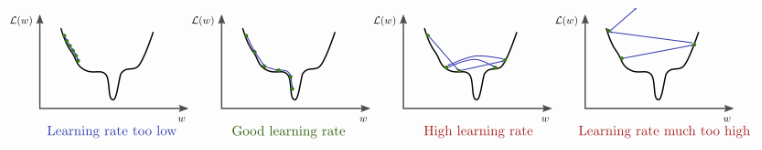

#### **학습률 스케줄링 (Learning Rate Scheduling)**

보다 좋은 모델을 만드려면 최적의 학습률을 설정해주는 것이 중요합니다.  
아래는 학습률에 따른 손실을 도식화한 이미지입니다.  
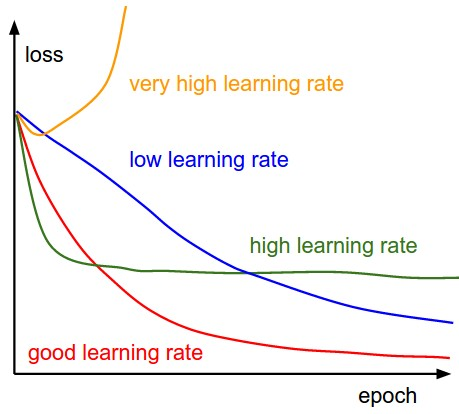  

보시다시피 큰 학습률을 사용할 때 초반에 손실이 급격하게 내려가는 것을 볼 수 있습니다.  
그렇다면 큰 학습률을 사용해 학습하다 점차 학습률을 감소시켜 최적점을 찾는게 가장 적절한 학습 방법이라 볼 수 있습니다.  

<br>어떻게 하면 점차적으로 학습률을 감소시킬 수 있을까요?  
사실 모델을 구축할 때 사용하는 옵티마이저에 이미 구현되어 있습니다.  
아래는 Adam 옵티마이저의 argument들입니다. ```beta_1```과 ```beta_2```가 지수 감소율을 설정하는 argument입니다.

In [ ]:
tf.keras.optimizers.Adam(learning_rate=0.001, 
                         beta_1=0.9,
                         beta_2=0.999,
                         epsilon=1e-07,
                         amsgrad=False,
                         name="Adam",
                         **kwargs
                         )

학습률 스케줄링은 지수 스케줄링뿐만 아니라, cosine, step 스케줄링 등 감소하는 모양에 따라 다양한 스케줄링이 있습니다.  
또한 warm up을 통해 학습률을 점차적으로 증가시키는 것 뿐만 아니라 주기적으로 증가와 감소를 반복할 수도 있습니다([링크](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)).  
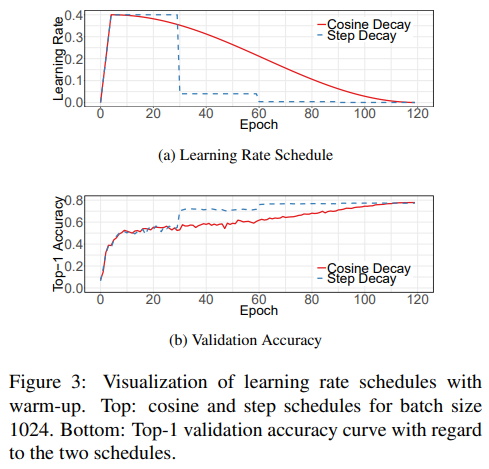  
> ❓ *warm up을 사용해주는 이유는 무엇일까요? 그리고 주기적으로 증감을 반복하면 어떤 이점이 있을까요?* 

In [ ]:
tf.keras.optimizers.schedules.CosineDecayRestarts(initial_learning_rate, 
                                                  first_decay_steps,    
                                                  t_mul=2.0,
                                                  m_mul=1.0,
                                                  alpha=0.0,    
                                                  name=None
                                                  )

## **3. 과적합 방지 기법**

모델이 과소적합(Underfitting)되었을 때와 과적합(Overfitting)되었을 때 중에 언제 더 해결하기 어려울까요?  
과소적합일 때는 모델을 보다 복잡하게 만들거나 더 많은 학습을 진행해 상대적으로 쉽게 해결할 수 있을 것입니다.  

<br>하지만 과적합은 그렇지 않습니다.  
딥러닝(Deep Learning)또한 머신러닝(Machine Learning)의 한 분야이기 때문에 과적합이 발생하고 머신러닝 모델보다 과적합에 취약합니다.  
복잡한 문제를 푸는만큼 학습되는 파라미터의 개수가 많아져 모델의 구조가 복잡하기 때문입니다.  

<br>과적합에 취약한만큼 과적합 방지를 위한 기법들을 아는 것이 중요합니다.  
아래에서 대표적인 과적합 방지 기법들에 대해 알아보겠습니다.  

### **가중치 감소 (Weight Decay)**

먼저 가중치의 크기가 커질 때 발생하는 과적합에 대해 이를 방지하는  
가중치 감소 혹은 규제(Weight Decay/Regularization)에 대해 알아보겠습니다.  

가중치 감소는 가중치가 너무 커지지 않도록 **손실 함수(cost function)에 패널티 항을 추가**합니다.  
이 때 벡터의 길이(혹은 크기)를 나타내는 norm이 추가되는 항이 됩니다.  
L1 norm이 추가되면 L1 regularization, L2 norm이 추가되면 L2 regularization이라 부르게 됩니다.  
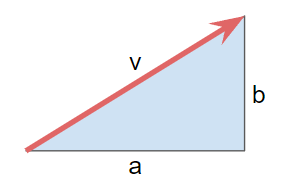  
빨간색 벡터 v의 크기를 구할 때  

- L1 Norm = $|a|+|b|$

- L2 Norm = $\sqrt{a^2+b^2}$



패널티 항이 추가된 손실함수를 수식으로 한번 나타내 보겠습니다.  
$+$를 기준으로 앞부분은 기존의 손실함수를 나태내고 뒷부분은 패널티로 추가된 norm을 뜻합니다.  
$\lambda$는 가중치 감소를 얼만큼 적용할지 결정하는 하이퍼파라미터이며 일반적으로 0.1 ~ 0.0001까지 매우 작은 수로 결정됩니다.

$$\text{L1 Regularization} : J(\theta)={1\over{2m}}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+{\lambda\over2}\sum_{j=1}^n|\theta_j|$$
$$\text{L2 Regularization} : J(\theta)={1\over{2m}}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+{\lambda\over2}\sum_{j=1}^n{\theta_j}^2$$  

<br>항이 추가가 되는데 어떻게 가중치를 감소시킨다는 것일까요?  
이 손실 함수를 이용한 경사하강법(갱신 가중치 = 갱신전 가중치 - 학습률 $\times$ 해당 시점의 기울기)을 나타내 보겠습니다.  
<br>먼저, L1 Regularization입니다.

$$\theta_j:=\theta_j-\eta\left[\left({{1\over{m}}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)}}){x_j}^{(i)}\right)+{\lambda\over{m}}sgn(\theta_j)\right]$$

식을 예쁘게 정리해보겠습니다.

$$ \theta_j := \theta_j-\eta{\lambda \over m}sgn(\theta_j) - \eta{1 \over m}\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)}){x_j}^{(i)}$$

그 다음, L2 Regularization입니다.
$$\theta_j:=\theta_j-\eta\left[\left({{1\over{m}}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)}}){x_j}^{(i)}\right)+{\lambda\over{m}}\theta_j\right]$$

역시 식을 예쁘게 정리해보겠습니다.

$$ \theta_j := \theta_j(1-\eta{\lambda \over m}) - \eta{1 \over m}\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)}){x_j}^{(i)}$$

<br>수식이 굉장히 복잡합니다. 다행히 이 식을 이해하거나 이 식을 이용해 값을 구할 필요는 없습니다.  
중요한건 가중치에 관련된 항이며 항 안에 m은 데이터의 개수입니다.

L1 Regularization의 경우 $\theta_j-\eta{\lambda \over m}sgn(\theta_j)$ 이 부분입니다.  
가중치의 부호에 따라 일정 상수를 빼주어 가중치의 크기를 감소시킵니다.  
가중치마다 일정 상수를 빼주기 때문에 작은 크기의 가중치는 0에 수렴하게 됩니다.  
즉, 가중치의 개수를 줄여 중요한 가중치만 남게되는 효과를 가지고 있습니다. 

L2 Regularization의 경우 $\theta_j(1-\eta{\lambda \over m})$입니다.  
가중치에서 1보다 작은 수를 곱하여 가중치의 크기를 감소시킵니다.
가중치를 일정 비율만큼만 반영한다는 의미를 갖고 있습니다.  
즉, 모든 가중치를 균등하게 작게 만드는 효과를 가지고 있습니다.

그렇다면 가중치 감소를 신경망에 어떻게 적용할 수 있을까요?  
```Dense```안에 인자 ```kernel_initializer```를 통해 적용할 수 있습니다.  
```kernel_initializer.L1```이 받은 0.0001은 $\lambda$입니다.

In [ ]:
...
model.add(Dense(64, kernel_regularizer=tf.keras.regularizers.L1(0.0001), activation='relu'))
...

아래는 cifar10 데이터를 이용해 동일 구조 신경망에서 가중치 감소가 적용되었을 때와 적용되지 않았을 때를 비교하는 코드입니다.  
$\lambda$나 규제 방법, epoch 등을 변경해가며 결과를 비교해봐도 좋습니다.

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255., x_test/255.

x_train.shape

170508288/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [ ]:
model_no_reg = Sequential()
model_no_reg.add(Flatten(input_shape=(32, 32, 3)))
model_no_reg.add(Dense(128, activation='relu'))
model_no_reg.add(Dense(128, activation='relu'))
model_no_reg.add(Dense(64, activation='relu'))
model_no_reg.add(Dense(64, activation='relu'))
model_no_reg.add(Dense(10, activation='softmax'))

model_no_reg.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy',
                     metrics = ['accuracy'])

model_no_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 422,922
Trainable params: 422,922
Non-trai

In [ ]:
no_reg = model_no_reg.fit(x_train, y_train, validation_split = .1, epochs = 100, verbose = 0)

In [ ]:
model_reg = Sequential()
model_reg.add(Flatten(input_shape=(32, 32, 3)))
model_reg.add(Dense(128, kernel_regularizer=tf.keras.regularizers.L1(0.0001), activation='relu'))
model_reg.add(Dense(128, kernel_regularizer=tf.keras.regularizers.L2(0.0001), activation='relu'))
model_reg.add(Dense(64, kernel_regularizer=tf.keras.regularizers.L1(0.0001), activation='relu'))
model_reg.add(Dense(64, kernel_regularizer=tf.keras.regularizers.L2(0.0001), activation='relu'))
model_reg.add(Dense(10, activation='softmax'))

model_reg.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               393344    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 422,922
Trainable params: 422,922
Non-tr

In [ ]:
reg = model_reg.fit(x_train, y_train, validation_split = .1, epochs = 100, verbose = 0)

In [ ]:
def visualization(model_1, model_2, title, monitoring_1, monitoring_2):
  plt.figure(figsize=(15, 10))

  plt.subplot(221)
  plt.plot(model_1.history[monitoring_1])
  plt.plot(model_1.history[f'val_{monitoring_1}'])
  plt.title(f'No {title} - {monitoring_1}')
  plt.xlabel('epoch')
  plt.ylabel(monitoring_1)
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.subplot(223)
  plt.plot(model_2.history[monitoring_1])
  plt.plot(model_2.history[f'val_{monitoring_1}'])
  plt.title(f'{title} - {monitoring_1}')
  plt.xlabel('epoch')
  plt.ylabel(monitoring_1)
  plt.legend(['Train', 'Validation'], loc='upper left')
  
  plt.subplot(222)
  plt.plot(model_1.history[monitoring_2])
  plt.plot(model_1.history[f'val_{monitoring_2}'])
  plt.title(f'No {title} - {monitoring_2}')
  plt.xlabel('epoch')
  plt.ylabel(monitoring_2)
  plt.legend(['Train', 'Validation'], loc='lower right')

  plt.subplot(224)
  plt.plot(model_2.history[monitoring_2])
  plt.plot(model_2.history[f'val_{monitoring_2}'])
  plt.title(f'{title} - {monitoring_2}')
  plt.xlabel('epoch')
  plt.ylabel(monitoring_2)
  plt.legend(['Train', 'Validation'], loc='lower right')
  
  plt.subplots_adjust(wspace = .15, hspace = .3)
  plt.show()

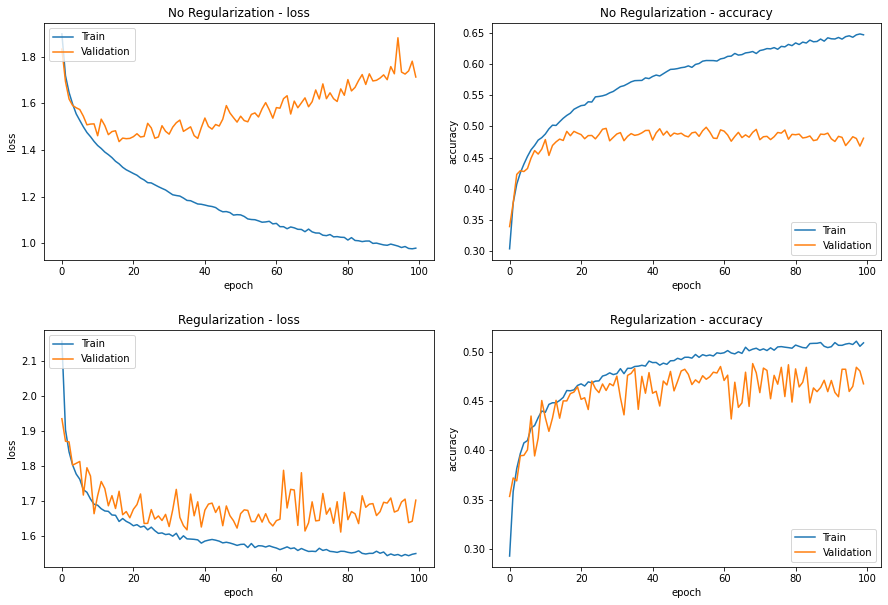

In [ ]:
visualization(no_reg, reg, 'Regularization', 'loss', 'accuracy')

가중치 감소만 이용해 수렴에는 어려움을 겪고있지만 과적합되는 것을 어느정도 막고 있는 것을 확인할 수 있습니다.  
> ❓ *검증 데이터에 대한 지표가 학습 데이터 지표보다 요동치는 이유는 무엇일까요? 가중치의 크기와 연관지어 생각해봅시다.* 

### **드랍 아웃 (Drop Out)**

드랍 아웃은 **학습 과정**에서 무작위로 노드를 제거하여 학습을 진행해주는 기법입니다.  
노드를 제거하면 **모델의 복잡도가 낮아지며**, **특정 정보만 가지고 학습하는 것을 규제하여 일반적인 정보를 가지고 문제를 풀도록 유도**합니다.

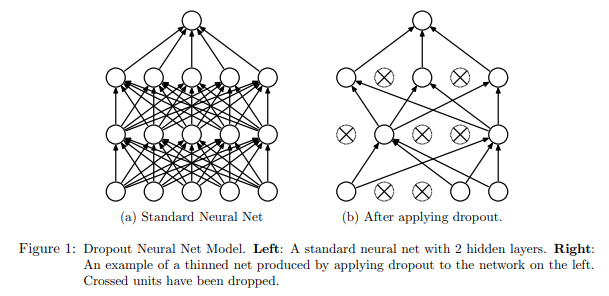  
무작위로 노드를 제거하기 때문에 매 번 다른 모델을 이용해 최적의 결과를 찾는 일종의 **앙상블(Ensemble) 효과**도 볼 수 있습니다.  
또한 노드의 가중치나 편향이 너무 커질 때, 주변 노드의 학습 속도를 감소시키는 동조화(Co-adaption)현상이 발생하기도 합니다.  
드랍 아웃은 무작위로 노드를 제거해주기 때문에 동조화 현상을 어느정도 방지하는 부가적인 효과도 가지게 됩니다.  

<br>드랍 아웃은 **학습 과정**에서만 적용합니다.  
테스트 단계에서 적용할 경우 테스트를 진행할 때마다 다른 출력값을 낼 수 있기 때문입니다.

신경망에 드랍 아웃을 어떻게 적용할 수 있을까요?  
적용하고자 하는 ```Dense```층 아래에 아래와 같이 코드를 추가하여 적용할 수 있습니다.  
0 ~ 1 사이의 숫자로 **삭제할 노드 수의 비율**을 인자로 받습니다.

In [ ]:
...
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
...

## **4. 배치 정규화(Batch Normalization)**

2015년에 [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf) 논문에서 제안된 기법으로,  
이름을 보았을 때 batch 단위로 정규화를 수행해준다는 것을 알 수 있습니다.  
그렇다면 왜 batch 단위로 정규화를 수행해주게 되는 것일까요?

저자는 배치 정규화가 레이어마다 입력(배치) 분포에 변화를 주어 **Internal Covarience Shift(내부 공변량 변화)**라는 것을 해결하여 더 빠르고 안정적인 학습이 될 수 있게 해준다고 말하고 있습니다.  
Internal Covarience Shift는 쉽게 얘기해 층을 지날 때마다 가중치의 영향을 받아 입력 분포가 변화하여 엉뚱한 방향으로 학습되는 것을 말합니다.  
앞서 **활성화 함수 ReLU에 표준 편차가 1인 정규분포로 가중치를 초기화했을 때**를 떠올려봅시다.  
층이 깊어질수록 활성값이 극단적으로 커지는 현상을 기억하시나요? 이 현상을 말하는 것입니다.

따라서 변화하는 입력 분포를 정규 분포로 만들기 위해 표준화(standardization)과 유사한 방식을 미니 배치(mini-batch)마다 적용하여 평균은 0, 표준 편차는 1로 유지하도록 만들어 주는 것입니다.  
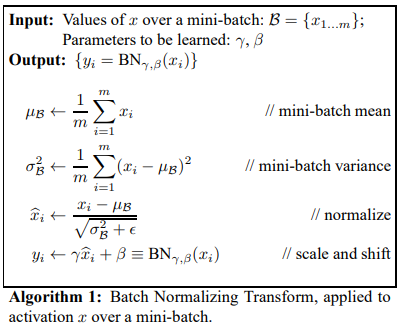  
1. 미니 배치의 평균을 구합니다.
2. 미니 배치의 분산과 표준 편차를 구합니다.
3. 정규화를 수행합니다.
4. Scaling을 수행합니다.

테스트 단계에서는 학습으로 결정된 값(평균, 분산)을 이동 평균 혹은 지수 평균에 의해 고정하여 사용합니다.

배치 정규화를 사용해주었을 때 장단점은 다음과 같습니다.  

- 장점
  - 가중치 초기화에 둔감해집니다.
  - 큰 학습률을 사용할 수 있어 학습을 보다 빠르게 진행할 수 있습니다.
  - 활성화 함수로 sigmoid나 tanh를 사용했을 때 방생하는 기울기 소실 문제를 개선할 수 있습니다.
  - 미니 배치마다 평균과 표준편차를 계산하여 사용하므로 훈련 데이터에 일종의 noising 효과를 일으켜 과적합을 방지하는 효과도 냅니다. 즉, 마치 드랍 아웃과 비슷한 효과를 냅니다.(물론 드롭 아웃과 함께 사용하는 것이 좋습니다.)
- 단점
  - 연산량을 늘려 테스트(추론)할 때 속도가 느려집니다.
  - mini-batch의 크기에 영향을 크게 받습니다. 극단적인 예시로 ```batch_size = 1```이면 분산이 0이 되므로 정규화 자체가 안될 수 있습니다.  
  - 순환 신경망(RNN) 기반의 모델의 경우, 계층별로 정규화 시에 연산이 굉장히 복잡해질 수 있습니다.

<br>단점도 존재하는 기법이기 때문에 후에 Weight Normalization, Layer Normalization와 같은 추가적인 정규화 방법도 제시되었습니다.  
배치 정규화를 이해한 다음, 이러한 기법들에 대해 추가적으로 학습해보시는 것을 추천드립니다.

> ❗ *당장은 배치 정규화에 대한 이해가 어려울 수 있습니다. '위 장점들이 있기 때문에 사용한다' 정도만 이해하셔도 좋습니다.*

<br> 이후 2018년도에 배치 정규화는 Internal Covarience Shift와 관련이 없고,  실제로는 landscape를 smooth하게 만들어 Loss Function의 Lipschitzness(립시츠 연속성) 향상을 통해 손실의 변화도를 낮추어 원활한 학습을 유도한다는 것이 실험을 통해 확인되었습니다.  
(논문 [How Does Batch Normalization Help Optimization?](https://arxiv.org/pdf/1502.03167.pdf))  
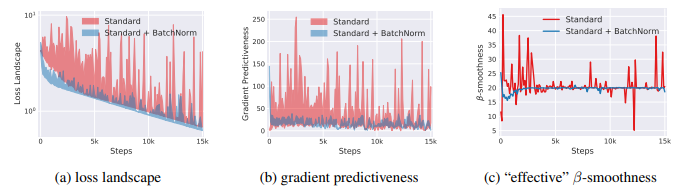  
쉽게 얘기해 경사하강법을 통해 최적점으로 내려가야 하는 골짜기를 평탄화시켜 최적점까지 빠르게 갈 수 있게 만든 것이라 볼 수 있습니다. 

결론적으로 이유와 상관없이 배치 정규화는 학습을 수월하게 만든다는 것을 알 수 있습니다.  
그렇다면 이를 신경망에 어떻게 적용할 수 있을까요?  
드랍 아웃과 마찬가지로 적용하고자 하는 ```Dense```층 아래에 아래와 같이 코드를 추가하여 적용할 수 있습니다.

In [ ]:
...
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
...

In [ ]:
BatchNormalization(momentum = .95, 
                   epslion = .005, 
                   beta_initializer = RandomNormal(mean = .0, stddev = .05), 
                   gamma_initializer = Constant(value = .9),)

```BatchNormalization()```에서 주로 사용하는 인자는 다음과 같습니다.  
- momentum : batch 별 평균과 표준편차를 구하기 위한 이동 평균의 지수 감소율입니다. 일반적으로 1과 가까운 0.999 같은 수를 사용합니다.  
- epslion : 배치 정규화의 수식의 $ϵ$입니다. 분모가 0이 되는 것 막는 매우 작은 수입니다.
- beta_initializer : 배치 정규화의 수식의 $β$의 초기값을 설정합니다.
- gamma_initializer : 배치 정규화의 수식의 $γ$의 초기값을 설정합니다.

## Reference  

---

https://arxiv.org/pdf/1502.03167.pdf  
https://arxiv.org/pdf/1805.11604.pdf  
https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf  
https://yngie-c.github.io/deep%20learning/2020/03/17/parameter_init/  
https://gaussian37.github.io/dl-concept-batchnorm  
https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/  
https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/  
https://gaussian37.github.io/dl-concept-regularization/  
http://www.bdhammel.com/learning-rates/  
https://towardsdatascience.com/the-subtle-art-of-fixing-and-modifying-learning-rate-f1e22b537303  
